# Psychopathy Prediction Based on Twitter Usage

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('PersonalityData_ExternalVersion001.csv')

In [3]:
df

,uid,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,...,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100
0,1,2.444444,3.4,3.444444,7.0,6.0,5.5,3.5,3.5,48.59,...,4.86,1.31,2.05,0.66,0.92,1.14,4.37,0.71,15.11,45.70
1,2,1.888889,2.4,2.777778,7.0,4.5,6.0,3.0,5.5,41.29,...,8.28,0.04,0.46,2.34,2.99,0.38,1.46,2.83,21.90,53.49
2,3,1.111111,3.0,3.444444,5.5,6.0,6.0,6.5,3.0,14.65,...,3.07,0.20,2.63,1.72,0.64,0.42,2.74,0.11,10.13,32.77
3,4,1.888889,3.0,2.444444,5.0,3.5,2.0,6.5,1.5,17.60,...,1.65,0.16,1.43,2.42,1.07,1.67,3.46,0.35,5.65,32.67
4,5,2.111111,3.1,1.333333,6.0,5.5,2.5,5.5,5.0,52.63,...,1.12,0.08,1.14,0.38,0.85,1.05,4.67,0.38,8.34,34.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2923,2.000000,2.4,3.222222,6.0,6.5,3.0,3.5,4.5,10.13,...,4.19,0.00,2.99,0.00,1.80,0.00,3.59,0.00,14.37,37.72
2923,2924,1.333333,3.0,2.444444,6.0,4.5,7.0,6.5,1.0,10.06,...,2.86,0.00,2.86,0.00,1.90,0.00,2.86,0.00,12.38,31.43
2924,2925,2.777778,3.6,3.666667,3.5,2.5,3.5,5.0,5.5,10.00,...,10.43,0.87,0.00,4.35,0.00,0.00,0.87,0.00,19.13,59.13
2925,2926,1.555556,2.9,3.777778,4.0,6.5,4.0,2.5,4.0,27.79,...,3.51,0.25,3.84,11.27,0.17,0.58,1.34,0.08,12.69,42.90


In [4]:
del df['uid']

In [5]:
df.isna().sum()

,0
psychopathy,0
machiavellianism,0
narcissism,0
openness,0
conscientiousness,0
...,...
Var96,327
Var97,327
Var98,327
Var99,327


In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,Var2,...,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100
count,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,...,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,1.981219,2.790434,2.741747,5.549858,4.671058,4.141467,4.722740,3.645521,26.142987,0.378192,...,3.860369,0.270738,1.292825,2.779874,1.212173,0.814426,2.812846,0.443445,13.180126,40.111475
std,0.590301,0.596976,0.608904,1.085809,1.397964,1.620921,1.212742,1.514496,13.150002,1.854189,...,2.471805,0.464083,0.732294,2.589448,1.286000,1.035828,1.215591,0.595855,6.140055,13.321148
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.670000
25%,1.555556,2.400000,2.333333,5.000000,3.500000,3.000000,4.000000,2.500000,14.050000,0.000000,...,2.140000,0.060000,0.880000,1.160000,0.560000,0.290000,2.030000,0.190000,9.465000,33.785000
50%,1.888889,2.800000,2.777778,5.500000,4.500000,4.000000,4.500000,3.500000,23.740000,0.000000,...,3.390000,0.150000,1.210000,2.110000,0.960000,0.630000,2.840000,0.330000,12.490000,38.760000
75%,2.333333,3.200000,3.111111,6.500000,6.000000,5.500000,5.500000,5.000000,37.075000,0.000000,...,5.015000,0.360000,1.600000,3.605000,1.540000,1.070000,3.620000,0.530000,15.865000,44.515000
max,4.666667,5.000000,4.777778,7.000000,7.000000,7.000000,7.000000,7.000000,69.860000,20.000000,...,32.880000,16.130000,12.330000,34.950000,38.360000,30.140000,12.500000,14.810000,100.000000,352.050000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2467 entries, 0 to 2925
Columns: 108 entries, psychopathy to Var100
dtypes: float64(106), int64(1), object(1)
memory usage: 2.1+ MB


<Axes: >

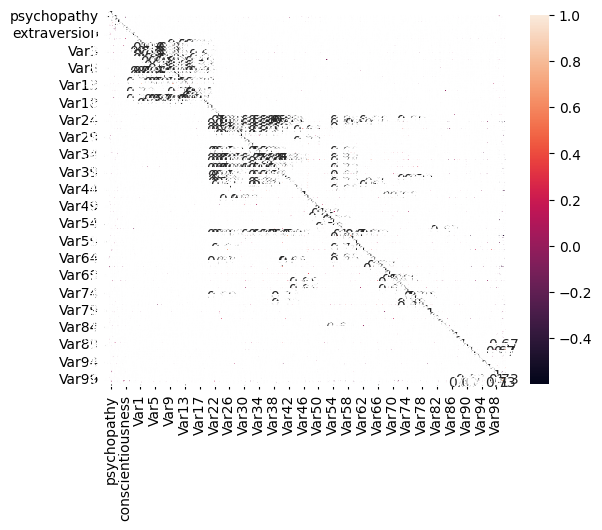

In [9]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [18]:
x=df.drop('psychopathy', axis=1)
y=df['psychopathy']

In [19]:
x=pd.get_dummies(x, drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
pip install xgboost

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()



        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [31]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,3.425558e-01,4.874003e-01,3.909427e-01
Linear,3.231100e-01,4.945559e-01,3.888956e-01
Ridge,3.221696e-01,4.948993e-01,3.889939e-01
KNeighborsRegressor,2.815664e-01,5.095064e-01,4.187564e-01
XGBRegressor,2.625213e-01,5.162155e-01,4.059126e-01
ElasticNet,2.825143e-03,6.002635e-01,4.911460e-01
Lasso,1.114346e-04,6.010798e-01,4.915482e-01
SVR,-1.446876e-02,6.054463e-01,4.887742e-01
AdaBoost,-1.349358e-01,6.403862e-01,5.128205e-01
Extra Tree,-3.866541e-01,7.078486e-01,5.566802e-01


In [40]:
from sklearn.ensemble import RandomForestRegressor

# Modelinizi oluşturun (regresyon için)
model = RandomForestRegressor()

# Modeli eğitme
model.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
tahmin=model.predict(x_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error,r2_score

In [49]:
r2_score(tahmin,y_test)

-1.7923255839243648

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tahmin ve gerçek değerler
tahmin = model.predict(x_test)  # Modelden tahminler
mse = mean_squared_error(y_test, tahmin)
mae = mean_absolute_error(y_test, tahmin)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.26058863401847254
Mean Absolute Error: 0.40174988756020247


In [28]:
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred = model_xgb.predict(x_test)
y_train_pred =model_xgb.predict(x_train)

In [54]:
y_pred = model_xgb.predict(x_test)
XGB_R2 = r2_score(y_test, y_pred)
XGB_mae = mean_absolute_error(y_test, y_pred)
XGB_mse = mean_squared_error(y_test, y_pred)
XGB_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [55]:
print(f'R2 Score: {XGB_R2}')
print(f'Mean Absolute Error: {XGB_mae}')
print(f'Mean Squared Error: {XGB_mse}')
print(f'Root Mean Squared Error: {XGB_rmse}')

R2 Score: 0.23106175535388496
Mean Absolute Error: 0.42444012634756
Mean Squared Error: 0.29270382822616
Root Mean Squared Error: 0.5410210977643662


In [8]:
#pip install pycaret

In [3]:
from pycaret.regression import *

In [4]:
setup(data=df,target='psychopathy')

,Description,Value
0,Session id,941
1,Target,psychopathy
2,Target type,Regression
3,Original data shape,"(2927, 109)"
4,Transformed data shape,"(2927, 111)"
5,Transformed train set shape,"(2048, 111)"
6,Transformed test set shape,"(879, 111)"
7,Numeric features,107
8,Categorical features,1
9,Rows with missing values,15.7%


In [5]:
best_model=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:08:42
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.3787,0.2329,0.4817,0.3536,0.1595,0.2087,0.2340
ridge,Ridge Regression,0.3828,0.2408,0.4895,0.3325,0.1630,0.2107,0.1250
lr,Linear Regression,0.3828,0.2411,0.4899,0.3316,0.1633,0.2107,1.0000
omp,Orthogonal Matching Pursuit,0.4439,0.3166,0.5608,0.1258,0.1847,0.2461,0.1890
en,Elastic Net,0.4833,0.3637,0.6022,-0.0072,0.1989,0.2706,0.1250
lasso,Lasso Regression,0.4832,0.3639,0.6024,-0.0077,0.1990,0.2706,0.1160
llar,Lasso Least Angle Regression,0.4832,0.3639,0.6024,-0.0077,0.1990,0.2706,0.1280
knn,K Neighbors Regressor,0.5174,0.4210,0.6478,-0.1663,0.2139,0.2874,0.1220
huber,Huber Regressor,0.5144,0.4278,0.6526,-0.1896,0.2145,0.2831,0.2160
dt,Decision Tree Regressor,0.5682,0.5345,0.7294,-0.4928,0.2388,0.3049,0.2520


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3806,0.2318,0.4810,0.3543,0.1594,0.2099,3.9950
br,Bayesian Ridge,0.3787,0.2329,0.4817,0.3536,0.1595,0.2087,0.2340
et,Extra Trees Regressor,0.3867,0.2385,0.4879,0.3365,0.1616,0.2143,4.1600
ridge,Ridge Regression,0.3828,0.2408,0.4895,0.3325,0.1630,0.2107,0.1250
lr,Linear Regression,0.3828,0.2411,0.4899,0.3316,0.1633,0.2107,1.0000
rf,Random Forest Regressor,0.3927,0.2446,0.4940,0.3192,0.1635,0.2176,12.3700
ada,AdaBoost Regressor,0.4143,0.2601,0.5094,0.2774,0.1715,0.2387,1.6030
xgboost,Extreme Gradient Boosting,0.4118,0.2703,0.5194,0.2447,0.1723,0.2255,2.9870
omp,Orthogonal Matching Pursuit,0.4439,0.3166,0.5608,0.1258,0.1847,0.2461,0.1890
en,Elastic Net,0.4833,0.3637,0.6022,-0.0072,0.1989,0.2706,0.1250


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:08:42
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


KeyboardInterrupt: 

https://www.kaggle.com/code/elifabdulhalim/psychopathy-ml-model buradan alındı burdan sonrası...

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Verileri ölçeklendir
    ('gb_model', XGBRegressor(random_state=42))                        # Ridge regresyon modeli
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [30]:
y_pred = pipeline.predict(x_test)
y_train_pred =pipeline.predict(x_train)

In [36]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    print(f"Model: {model_name}")

    # Eğitim performansı
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"Eğitim MSE: {train_mse:.4f}")
    print(f"Eğitim R²: {train_r2:.4f}")

    # Test performansı
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test R²: {test_r2:.4f}")

    # Eğer sınıflandırma ise doğruluk hesaplama
    if len(set(y_train)) <= 2:  # İki sınıf var ise
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"Eğitim Doğruluk: {train_accuracy:.4f}")
        print(f"Test Doğruluk: {test_accuracy:.4f}")

# Fonksiyonu çağırma
train_val(y_train, y_train_pred, y_test, y_pred, 'LGBM')

Model: LGBM
Eğitim MSE: 0.0011
Eğitim R²: 0.9969
Test MSE: 0.2528
Test R²: 0.2521
